## Logan Becker (Section A)

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [35]:
'''your code here'''
import numpy as np #Importing numpy 
def greaterThan(A, lower_lim): #Def the function greaterThan and having the inputs be A and lower_lim
    return np.where(A > lower_lim, A, 0) #If A is greater than the lower_lim it will return A is less than lower_lim it will return zero

In [37]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [40]:
'''your code here'''
def subtractMean(A): #Def the function subtractMean and having the inputs be A 
    mean = np.mean(A)  #Calculating the average of all the numbers 
    result = A - mean #Subtracting the average from each number
    return result #Returning the results 

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [43]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [15]:
'''your code here'''
import numpy as np #importing numpy
def arrayEdges(array):
    if not isinstance(array, np.ndarray) or len(array.shape) != 2: #Checking if it is a 2D array using len()
        print('Error') #Printing an error message if the input is not a 2D array
        return -1 #Returning -1 to (shows that theres an error)
    height, width = array.shape #Getting the number of rows and columns
    perimeter = 2 * (height + width) - 4 #Calculating how many edges there are
    edges = np.zeros(perimeter, dtype=array.dtype) #Creating an empty array to hold the edges
    index = 0 #Starting at the first position in the edges array
    #Top row (left to right)
    for A in range(width): 
        edges[index] = array[0, A]  #Adding the top row elements to edges
        index += 1 #Moving the element from the top row to edges
    # Right column (top to bottom)
    for B in range(1, height): 
        edges[index] = array[B, width - 1] #Adding the right column elements
        index += 1  #Moving to the next position in edges
    # Bottom row (right to left, excluding the corners)
    for A in range(width - 2, -1, -1): #Starting from the second-to-last column
            edges[index] = array[height - 1, A] #Adding the bottom row elements
            index += 1 #Moving to the next position in edges
    # Left column (bottom to top, excluding the first and last elements)
    for B in range(height - 2, 0, -1):  #Starting from the second-to-last row
            edges[index] = array[B, 0] #Adding the left column elements
            index += 1 #Moving to the next position in edges
    return edges  #Returning the array 

In [17]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [20]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 344

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - 2700.0
  - 6300.0

 3. What species of penguins were recorded and how many of each?

 - Adelie = 152
 - Gentoo = 124
 - Chinstrap = 68

In [23]:
'''your code here'''
#Answer to number 1
number_of_penguins = len(pp_df) #Calculating the total number of rows in the data frame (this represents the number of penguins)
print(number_of_penguins) #Printing the total number of penguins recorded

344


In [25]:
'''your code here'''
#Answer to number 2
smallest_penguin = pp_df['body_mass_g'].min() #Finding smallest body mass 
largest_penguin = pp_df['body_mass_g'].max() #Finding largest body mass 
print(smallest_penguin, largest_penguin) #Printing the smallest/largest body mass

2700.0 6300.0


In [27]:
'''your code here'''
#Answer to number 3
penguin_species_counts = pp_df['species'].value_counts() #Counting the occurrences of each species 
print(penguin_species_counts) #Printing the occurrences of each species 

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

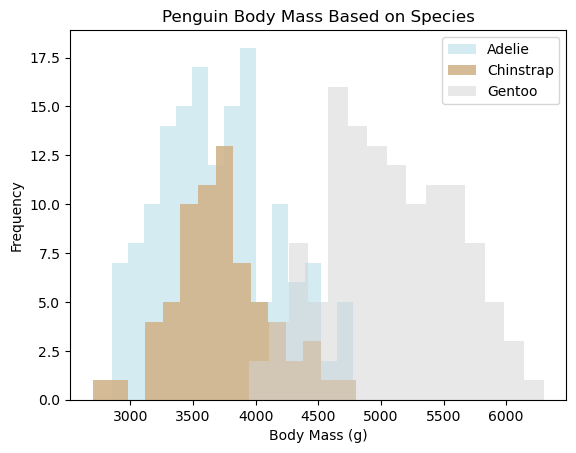

In [30]:
'''your code here'''
import matplotlib.pyplot as plt
adelie_mass = pp_df['body_mass_g'][pp_df['species'] == 'Adelie']  #Filtering the body mass for Adelie
plt.hist(adelie_mass, bins=15, alpha=0.5, label='Adelie', color='lightblue')  #Creating the histogram

chinstrap_mass = pp_df['body_mass_g'][pp_df['species'] == 'Chinstrap']  #Filtering the body mass for Chinstrap
plt.hist(chinstrap_mass, bins=15, alpha=0.9, label='Chinstrap', color='tan')  #Creating the histogram

gentoo_mass = pp_df['body_mass_g'][pp_df['species'] == 'Gentoo']  #Filtering the body mass for Gentoo
plt.hist(gentoo_mass, bins=15, alpha=0.5, label='Gentoo', color='lightgray')  # Creating the histogram

plt.title('Penguin Body Mass Based on Species') #Adding a title 
plt.xlabel('Body Mass (g)') #Adding the x-axis label 
plt.ylabel('Frequency') #Adding the y-axis label 
plt.legend() #Plotting the legend 
plt.show() #Showing the plot 

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [45]:
'''your code here'''
import numpy as np #importing numpy 
def interleaveArrays(A, B):
    if A.shape[1] != B.shape[1]:  #Checking if the number of columns in both arrays is the same
        print('Error: Shapes of arrays are not compatible.')
        return -1  #Returning -1 if shapes don't match
    if A.dtype != B.dtype: #Checking if the data types of both arrays are the same
        print('Error: Types of arrays are not compatible.')
        return -2  #Returning -2 if types don't match
    rows_A = A.shape[0] #Getting the number of rows in A
    rows_B = B.shape[0] #Getting the number of rows in B
    max_rows = max(rows_A, rows_B) #Finding the maximum number of rows from both arrays
    interleaved = []  #Creating an empty list to hold the interleaved rows
    for i in range(max_rows):  #Looping through the maximum number of rows
        if i < rows_A:  #Row in A adding it to the interleaved list
            interleaved.append(A[i])
        if i < rows_B: #Row in B adding it to the interleaved list
            interleaved.append(B[i])
    return np.array(interleaved) #Converting the list back to an array
#Testing 
#Example 
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])
result = interleaveArrays(G, H)
print(result)

[[   1    2    3]
 [  10   20   30]
 [   4    5    6]
 [ 100  200  300]
 [1000 2000 3000]]
